# MNIST from scratch

This notebook walks through an example of training a TensorFlow model to do digit classification using the [MNIST data set](http://yann.lecun.com/exdb/mnist/). MNIST is a labeled set of images of handwritten digits.

An example follows.

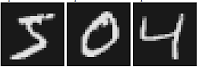

In [4]:
from __future__ import print_function

from IPython.display import Image
import base64
Image(data=base64.decodestring("iVBORw0KGgoAAAANSUhEUgAAAMYAAABFCAYAAAARv5krAAAYl0lEQVR4Ae3dV4wc1bYG4D3YYJucc8455yCSSIYrBAi4EjriAZHECyAk3rAID1gCIXGRgIvASIQr8UTmgDA5imByPpicTcYGY+yrbx+tOUWpu2e6u7qnZ7qXVFPVVbv2Xutfce+q7hlasmTJktSAXrnn8vR/3/xXmnnadg1aTfxL3/7rwfSPmT+kf/7vf098YRtK+FnaZaf/SS++OjNNathufF9caiT2v/xxqbTGki/SXyM1nODXv/r8+7Tb+r+lnxZNcEFHEG/e3LnpoINXSh/PWzxCy/F9eWjOnDlLrr/++jR16tQakgylqdOWTZOGFqX5C/5IjXNLjdt7/NTvv/+eTjnllLT//vunr776Kl100UVpueWWq8n10lOmpSmTU5o/f0Fa3DDH1ry9p0/++eefaZ999slYYPS0005LK664Yk2eJ02ekqZNnZx+XzA/LfprYgGxePHitOqqq6YZM2akyfPmzUvXXXddHceoic2EOckxDj300CzPggUL0g033NC3OKy00krDer3pppv6FgcBIjvGUkv9u5paZZVVhoHpl4Mvv/wyhfxDQ0NZ7H7EQbacPHny39Tejzj88ccfacqUKRmHEecYf0Nr8GGAQJ8gMHCMPlH0QMzmEBg4RnN4DVr3CQIDx+gTRQ/EbA6BgWM0h9egdZ8g8PeliD4RutfF/Ouvfz9OtZy8aNGiNH/+/GGWl1122XzseYuVNKtqsaI23Ghw0DYCA8doG8JqO+AUG2+8cVq4cGHaY4890vLLL5/WXXfdfI6jvPDCC3lJ8amnnkoezP3000/pl19+GThHtWpIPekYomTxFS7HnkqKjMsss0yGgFE4r62tSBFVJ02aNPyconi9V4/JwzHwT9ZNNtkkeZ6w5ZZbph133DH99ttv6ccff8zXX3nllcRRnHNfv2cNGMQWGRaOrWbUrjsGBRLAA6U4Lhoqw9h2223ztRBq6aWXzsbgvueffz4Lu9NOO2UnYTgrr7xy7tO9nOH111/Pbb744ov0ww8/jAvngAdFMvQDDjggG/0GG2yQX1GZNm1aziCCwzrrrJPl3muvvXKwePnll9M333wzHDCKWPbLMbuAkfISjnvvvXcW/emnn85lqCBqa4a65hiYR/Gk2RNGRlwm3n7ggQfmdrKD9sqJtdZaKxvCnDlz8n3Tp09PXmPYeuutc0SVNQjvnmuvvTa3efzxx9N33303PGZ5rF75DBvvqq233nrp22+/TWeddVbyikpgxCE4vQDhlQUBRfDw2esbs2fPTquvvnqviNN1PuIdJ4GErVx44YUZowsuuCB9+umn6eeff84BspmsWqljhPFDxjGGYx/lDkN33udajCoVlAjRzl4U8LjefRwnPjsXG8OJqKBd8NB1LTU5IHyCd7LJGOYXNoGjFqaGIKtrERDIDKtukfGMH/zRZa1A101+YBF44KfMYzO8VOYYjDWiukiGqc022yyXOUqdzTffPJ/z1ialeqNVxA9gi0wzlOJ5juJlR8JeddVV+ZrIKTq4ZvJp/8EHH+SU+txzz+W2SqmxVFZRplrH5DTRXmGFFdKuu+6azjjjjOzosl5g6D54CQCI4mGjhNQO5occckh2LvLTA6fqJOEnyhU6kNlkZmUuvrtNcFx77bUzhsZWXgoSsm6t4Dsa/tp2DErCmA04HAI4FLjaaqtlBhmnSKiNY4rDtHZFB6jFMMH0RVDH+nCPYxtDCFJnKkniRbDitWjTK3sykQUuMLPn3DZGX8SFnCG/fVyz5zCCBtIHTLshdzif8fERn8cKXxjCNOwCTu3Qf6yqhV4AQokiP489//zzM0DxnQYKwqAtIkko1kQzFFxvaNcJ6u3Pe+65J/cRRvDee+9lA2BInIyRff/997nNO++8k7t0vl2A6vHWynmyiPJ43WKLLbIijz/++LTddtvlTCdzwIWSg9yjxBJ0GN/DDz+c7zv77LOzbEceeWSekwVGgsOsWbNyNo0+qt7DfPvtt8/dmtvIGnPnzk3PPPPMsJ6rHrNef/BBeJA90RprrJEDcNhctMkXR/mnbccwuCjNGTbaaKMc8TBZprITxOdgOvbuKxqGz6LSJ598kseJ9Gi1CYmSv/76a3YyJZWMZJ6Ceskp8EMusihFEAyUmVaa8G2rxTNHIrd733///eH7YeaLNe5xrEzlWNF/HqQDf0Tm+GIbvYdD43MsKAIo/JDgE0G5aFfN8NaWYxiUshikqGYTTUSt0TCkjXsYNqJQQso+rgGa0vX58ccf56hQTtk+48F92rmvlnE1A0on2uKP0Yrw+Nxzzz0zn+ZhjKwRXq6vueaa2TmUiRQfS7SyNeMks9IV9vrvJOl/q622yo4Mfw5Pvm6TMclLdit6shh+YAMnq1E29tEsteUYBgMSgxa5MOAzJZcVXQs4bUR8XxhCHIwzMALCBuCcx5q0tF3u133l8XrRMchFiRYNyMxBKM/5IjZlWVzjULKwACISytIWFsi56aab5mvOKyEikmdAO/iHY+BDCRUZuoPD1e1akECyLseA7d13352DhdKak8Cmlt3U7TSl9p58FwejYK8ncAwKpDTnGDcARbWiAUjHiNEHsITSPlagpEZChcfrZzwSOfBOiQwXLuR3PjAhtwAD08iAMCO/a+5xPTIm3ALjwERf0V+c69QeT7ZujVdLDhgKBrANXAMreMESRkU7rdVPrXNtZ4xIpSLH1VdfnR3j4IMPzkbw2Wefpa+//jovo5188slZsZjArAcvFP3YY4+lSy+9NEdTdTTy0I5xHHfccfm1CH2LtuORKEqmkwVlVU+sBY+IdJRmE0zeeOONnEXuu+++7AhnnnlmWn/99XMJ5brtzTffzHMJx/o555xzkgdb0U8rRtAKrnTYqtG1Ml6teyxInHDCCdlGYByBmG2Z97ChVvFo2zEwbHCRTbqP7EDxPjN2pUBEe86AXAcsg+f10TYMSTvnRM1ulQe1wG/nHEXZZEJZUIYQ5cgWMsEgMgqclFdkdh+MbFFyuddnWMLNfTYkcuuXHlBkpFYNI3dS+mMMfCHHsZWadfUjmQVn8iLywscG21apMscQwR555JEM3KuvvpoZ5LHOmzgjAvBwzFt2/Oijj3Lm4Ayin/MU/eGHH+b2N998c/5MGSaZ44nw7OEd5Rx77LE5+1EehYXxkpes5li2K6+8Mhv8Lrvsko381ltvzcEBfvHQKh5auk9GPvHEE3NJAx+/eKL/HXbYIQcbK3nwN067xAk4s5VHdbvsx0nxrYQeKxJMZAfBA7GlRx99NC9EtCN7JY4RoPBeAHIAyrB3jpHYwqu1d02d7HpZcfqINo5dL7eJMXtxTzk2sgWFM/gcsnCakI2cFOk+523O+Qw7WaeYHYpYRp9xn4BkbPdWSfgJXYYM+ne+2xRj2sdx8EDu8rm4Ntp9pY4RSmb0CIPOAVNGoLA47yU4S2xen37ppZdy9CkLE/3lm8bJHzJbbiavt2Q9p7AkK7oyXAZOLk7gs9c4PJC0AOE8DDyrgJkaWgYQkSPYuAdpWySfteU8HhqKouYq+io6ZfGeZo7xpbT1+jt+jGULfprpq922ePHMBibwjWVq523KVrzBsIzTaMeu1DFi0HI0YyyYtAekY5MltbRyihFJiROBKIYTwMCTWJNubwdQFCXFapK9z96mtbjgs3thFKWnUgjBzNZIya5FOyUcPG36q4LwRgZ6Ix8HtBk3tirGGU0feAkslHfk5PzBh2cXSkvtWqWOOEaRGcoSHdXDMoYn1tK8yaON0ahbCWgFS/vxSnjn5F4ItLeiFAGAzCKc7MDA1OlIjc4pLFKE7FEyxb5ZPNTbtuiv2fvrtddfOFsYXcwj8d8qv/XGq3femLvvvnvOvrIYPPEjG+PDseDbDnXcMXiyiGiyyACOPvrovN95552zV3/++ef5zVveznlEo6CICvG5l/d4JSvHP+qoo7JjKDs4PkVSGPm9HSz9W5rlPEoCQYHjVFXyRGnBOcKA28VOP/qTBWX6YnS2IKB8qYL/enyGHPbKziOOOCLj6sGeslGW8L6Y4ANr2MY99fpsdL7jjmFwkSTSr6gDVCk+tmDQedcJ5LgdwaLPbu7xjJRRNlErSsiQhVHJlOEQoh182o1wRTnharwYs3itnWP9Rd/RD5mLW5yveh/YRhYMjItyBh/wjPat8tEVx6B00RKo5513XpIl7rzzzuwEourMmTOz95uIcyBfTSXYiy++mCOrSFS1klsFrNZ9eGPoJtmeyRx00EE5cpGbIi21XnbZZbkMee2117KMHIKMIVcotVb/vXoOz6I0+URoMlVFcBFE7L1+IjNYIo6v/fo+D3tC+FCR+FHuwNUCgfOtUlccI5hnJMoIBhN1sBICqMoNNaLP3pkiFGciIIBC4HaEbRWk0dyHb3Mp/EY0I6+NsytvyKxsKhpQr8ozGpm1IZ8IbV+PyllGuyh1YBXXOQEcy6R8M5eAHzuxxX3GRvbaCKJ4aRfXrjkG5jEbk00Prxi8SZTJKmc5/PDDc5v99tsvC+hBjWtqStmD0F4Ma1foMvDtfqZMUc3/lYjMSFFW3NS7JtyyoKzSiTocHoFJHMc+MlK7Mta7n9NbATJerbEYvQWIWCVitIyaXrV3nsG7H2Y2GVcbxyj6NX+waKEPmOvbfShwtjhQDDz5Ygt/uuoY+OPtnICDEMBTWsAQUu0NBBsDEgFEWOADAiDaVRERWsCq5i34IRN+TbTJgn8KwzOFuR4KDUXW7Kyik53Ep8w/+RkxWeO5S1EM5wVABguXMGp69dk1x87D0ObdL32GHI5tsDQGHtwbm/Hw4TpnKvNY5Ge0x113DEwT3tIsIdSnDIfxcxJAevCHfE9cXcmotHXfAw88kIFUdgFjLMn4HuZRuh9FExmjRCCnZxRqcPxz8ioUVk9eRhJkPAYHV8ZVFRkjjFSfAtw222yTy2OZ0iv15fHcQ4dKaMcwsBdEEL26RzaIh5+yK7LSBGPno8yOZX+vzRhfXzZ8cRrtyzzkzpr803XHwB8wTJYIRol+VY8zqMMBbP0f+cExE1qTdbU7x3jwwQdzVBYdesExKNiEWx2MfwoOAyCbJ9uRHZvUTcPmsENhGNE4HBKOHKNqZzQu3KNfX9H1nRABQZlbNkpt4SNo4DWIIesDj9qYnwki2giWqol3330348kZLPm7xvi1Pffcc7MzhA3gy/0oeIuxWtmPiWNgNCIFYwcCAa2FA1ikJZz1aeUVsBmge9TyoqGoIqKUFdEKCFXcU0/pHJizVMUnXBiBh6IicdTTzsEOnuZkDE/2rcJI4KMf/TF+0TucwDhkZ+DGL4/nGkPGV/AIC+2RvfP6ZPTI4gu5XNM/Um7RPzuIFyn1zW7wpQ9UHj+fbOHPmDlGCOGBGIeQQfwuq0jnISBQfOHft7JEHN94Q5xF6XLFFVfkyKIEGyuiGAo3r6BIx0imcM6k+6GHHspOEQbcDq+UTl4BwRu7PstUiPEJFsa9/PLL83nXg6d2xnUvoxS5L7744uGyh/wyRpRF9YwSHsHjE088kWWADQeRFThZkTgBstensZG5h4m56oEdcAp9CwTOVUlj6hgECcGBpA6XDazeiLKhVABQAhKB3cNxbEAL4KoEppm+gjf3OMafDf+UW7zeTL/ltqIiAxBMOIIxnLOHgbFsMGQ4InhE0nJfrXw2hnIRD3SFBKmYWDfqE49woFvOzZno3NxM0HDciMjBDsjEBgLTsJHYN+qjmWtj7hjBLKFFQgL7qRz14jHHHJPBcC2M3wRPVDT5ohzZRv0Z16O/sdozAKmdopUH5kftTrzJpl+lk29CcgpLw3BgpMbwwqF/S80pGJ6xO0WM+8Ybbxw2TuOEoTYakwyovB/JKdzDMVQOHvCRzXju890fL11aGhcMqqIxdwwCRkYQDZAaE7lWBhyosQEmQM439MgffDHm0Si8EcuBC0ezcQSZVKYktzFEW+3sfQ4natRvu9eMTS9F7IvHo+m/2fb6LNuCc0WsW+mzHq9j6hgE9YCHp5tkez2EAVjlMOmyUlU2Lis8ygVR0rykyoltPZCaOY9fr32Qp50X6xi7pWCGbsHBvwLgGIcddljGxvcsjOU1GseyiKjJQWydpiqNsBlei85BfhNxeJunVCl31x0jBOMAjJ9jRC3OEERDS7QMI0qQohIYgLSq7FJuMZbi9WZA7kRbvFAWx5Dyy449mjEDG/dyDPW4VSiy2iNvBcCSUdxyyy35OYHrqJUx843j8I/qQpA074BVVdR1x+AIHCIiIGewsqIuds41tSSlOxeOFHuOQ/E+2zPEuFYVKM32U3RMvGy44YbZMTg2B2+GOIXXJcjpR9lkUy/QyZ7GUU8zAD9RCiuR0oQYVv1IMAk7qFL+rjkGg7GZQPLufffdN69QKJtkCAKKjNGu1p7gMgWDYEDRpkpAmu0rnMLehie/RavcI49Sr1ZW0w6V91ac/IsxmdHPB0U5pQ+4+TExDudNUhPufnaKIn7N6m2k9h11jKLRqP+UQJb2eHh4uYjK0LW1D0MpCq0NR4g24RTR/0hCdvM6/m14FtljeTL4D/liedFeO7LYcyh7eMGDY8X16IM8Vp9kWjj2GwWG5IZb2FKVOHTMMTCvDKBgD2Z22223bNynnnpqVrZXBFxjQDZUFJiwIqKHN8qHO+64IxvN/fffn9vG/VWC0UpfeC5uZMEbg/ctM/8SzYOxZ599Nhs4ebSx0ECpcDFvMCdRggkesoQ+zaHU0N4EgAEnue2227JTON+LgaEVDFu5h+w2Wdl33GFkEUIQqYIqdYwwbJGO8q2xOydqUiTFWpJVPzsuUwhlzzFETxlGdFSCqaMB4XwvUzgKWU3AyW4uwFns4QMbilUyxbq8p/4cw3UEB8FDGQUDx/acqB8zRS2dw5qthe3VatPKucocg6JiYu3lP2nfawvekKVITzgJQLH24QTBtPZeE2D89957b27jwZ1IwIm8R2OMWHmJ+3pxTzaK8l+HyMrgTzrppMxqOIEsGoZvz0nsyWiliRMUl2G9aOk6POyLZVUvYtBpniL4wA1m9lVSW46BOQqKpTLK9FnUsxftvW4swssa4dkhCGFCMNfcp08lhM9KKc4h0obgsa8ShHb6Cv5DJnu8IwHB9TB852DkOlzIRV6kXbSVMfQj48BWdhE0TLr1Fe3zQR/+gRMK5yjuq4KjZccQ2SlYjexHmCnSkiLjtsesmlnpQ5naFo1A5GMAHoJxBI709ttv54ygntZWmWEcQMS9VQleRT9kNmfAG0P3HRPGbHnVudg4gEyJOAYiE0wikHAAcxHyxndO4KI/WHEK/Qzo7wjAXfaFNdurikaNtIERRTqmYIYdE2tGEs8hfJ8iFB/3xV67MCjG8NZbb6Unn3wyC+XfDxfnDxFp496qhK6qn5CDA5twK/fIRH5Gb0MMOhxCFgkKjOBoHqKEkmWvueaanG04iTHcP3CKQO0/e3ZhgceP2smqcKyKRuUYlEKhPDL+d5z1c4qVFTDnmBIZMwZ9DiKAzTmvCetPNFR7W7fXXt/KLddqTcyjr17bRybkEF5XiQhPHnMuDlF07MCB3I49l4EDxTrnfsFBJBxQbQSKeGoROqjdurWzIzoGJqRxS2KUf/rpp2flcRDRjRKVCdpFhCwz7rOVKE5z++235/7uuuuuXDq5P5yKEY0np8B3TKb9K1/vLTF0/7MiJtyRPYrq4fx+7R2e7vFDDzDyfx1goPwcUGMEYG/rFI3oGAYW0UUyimQIcRwGzbgpVsZAUTYE065xCtc5GUeSHTyg4kzKs/FKoSBljyhvTz6y2gseZAwlwgI+cNBGtpV9ZRj4BobjFY9O8g0bQcXWaRpxBE5hHuFnJ0XB6dOn56ge2QGDlK2dFSSG4b8kxVzEdSWGVxgYQLzrxJkIGgbTaUE73b9MZ/KNfIMOJpdcckndYZWmFAwv+wgydW/o8wsCK3xnz56dFzx8oxPGtk7QiI5h0FBaeGzRKYIpjDN2ig6lB9OiprmI60qNieIMIXvsQy7yotjH9eI+2hbPDY4bI8D+2JdnWTYY+iwDs78qaUTHEM0sI1pClAVMnqX9ImGQszB6DHoNOLzZNZlGRlEq9JNB9JOsRXvoxDGnsDTudwFUHTNmzMjDqEaU9xYvGgWiZnka0TEo16CeNyCM1SLtwmt5cNEoCOUa5xjQAIFWEGBP5rbKdTRr1qwcfGUMthXVTCt917pnRMdwE6ZiQm0JckADBMYCgWLwtXjTSeq/d5Y7ieag7wmDwMAxJowqB4JUicDAMapEc9DXhEFgcjxcM7vvR4on7bHS1q84WNkpUr/iEL+aOLRw4cIlQCmuIhUBmsjHlpQ9c7EmzjEsN1vd6DeCg8UVT+qRd7b6EQey8wMT+6El8RSu36xhIO8AgQYI9F94bADG4NIAgUDg/wHX+3lgThDIegAAAABJRU5ErkJggg==".encode('utf-8')), embed=True)

We're going to be building a model that recognizes these digits as 5, 0, and 4.

# Imports and input data

We'll proceed in steps, beginning with importing and inspecting the MNIST data. This doesn't have anything to do with TensorFlow in particular -- we're just downloading the data archive.

In [5]:
import os
from six.moves.urllib.request import urlretrieve

SOURCE_URL = 'http://yann.lecun.com/exdb/mnist/'
WORK_DIRECTORY = "/tmp/mnist-data"

def maybe_download(filename):
    """A helper to download the data files if not present."""
    if not os.path.exists(WORK_DIRECTORY):
        os.mkdir(WORK_DIRECTORY)
    filepath = os.path.join(WORK_DIRECTORY, filename)
    if not os.path.exists(filepath):
        filepath, _ = urlretrieve(SOURCE_URL + filename, filepath)
        statinfo = os.stat(filepath)
        print('Succesfully downloaded', filename, statinfo.st_size, 'bytes.')
    else:
        print('Already downloaded', filename)
    return filepath

train_data_filename = maybe_download('train-images-idx3-ubyte.gz')
train_labels_filename = maybe_download('train-labels-idx1-ubyte.gz')
test_data_filename = maybe_download('t10k-images-idx3-ubyte.gz')
test_labels_filename = maybe_download('t10k-labels-idx1-ubyte.gz')

Already downloaded train-images-idx3-ubyte.gz
Already downloaded train-labels-idx1-ubyte.gz
Already downloaded t10k-images-idx3-ubyte.gz
Already downloaded t10k-labels-idx1-ubyte.gz


## Working with the images

Now we have the files, but the format requires a bit of pre-processing before we can work with it. The data is gzipped, requiring us to decompress it. And, each of the images are grayscale-encoded with values from [0, 255]; we'll normalize these to [-0.5, 0.5].

Let's try to unpack the data using the documented format:

    [offset] [type]          [value]          [description] 
    0000     32 bit integer  0x00000803(2051) magic number 
    0004     32 bit integer  60000            number of images 
    0008     32 bit integer  28               number of rows 
    0012     32 bit integer  28               number of columns 
    0016     unsigned byte   ??               pixel 
    0017     unsigned byte   ??               pixel 
    ........ 
    xxxx     unsigned byte   ??               pixel
    
Pixels are organized row-wise. Pixel values are 0 to 255. 0 means background (white), 255 means foreground (black).

We'll start by reading the first image from the test data as a sanity check.

In [6]:
import gzip, binascii, struct, numpy
import matplotlib.pyplot as plt

with gzip.open(test_data_filename) as f:
    # Print the header fields.
    for field in ['magic number', 'image count', 'rows', 'columns']:
        # struct.unpack reads the binary data provided by f.read.
        # The format string '>i' decodes a big-endian integer, which
        # is the encoding of the data.
        print(field, struct.unpack('>i', f.read(4))[0])
    
    # Read the first 28x28 set of pixel values. 
    # Each pixel is one byte, [0, 255], a uint8.
    buf = f.read(28 * 28)
    image = numpy.frombuffer(buf, dtype=numpy.uint8)
  
    # Print the first few values of image.
    print('First 10 pixels:', image[:10])

/home/constantine/space/src/aihub/workshops/env/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


magic number 2051
image count 10000
rows 28
columns 28
First 10 pixels: [0 0 0 0 0 0 0 0 0 0]


The first 10 pixels are all 0 values. Not very interesting, but also unsurprising. We'd expect most of the pixel values to be the background color, 0.

We could print all 28 * 28 values, but what we really need to do to make sure we're reading our data properly is look at an image.

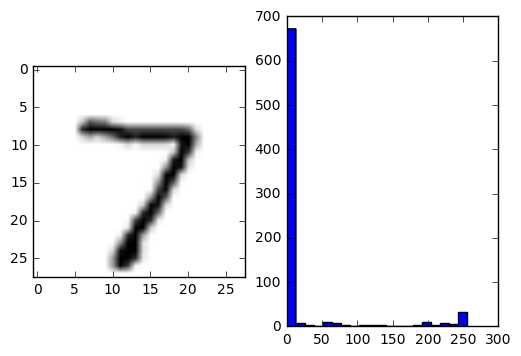

In [7]:
%matplotlib inline

# We'll show the image and its pixel value histogram side-by-side.
_, (ax1, ax2) = plt.subplots(1, 2)

# To interpret the values as a 28x28 image, we need to reshape
# the numpy array, which is one dimensional.
ax1.imshow(image.reshape(28, 28), cmap=plt.cm.Greys);

ax2.hist(image, bins=20, range=[0,255]);

The large number of 0 values correspond to the background of the image, another large mass of value 255 is black, and a mix of grayscale transition values in between.

Both the image and histogram look sensible. But, it's good practice when training image models to normalize values to be centered around 0.

We'll do that next. The normalization code is fairly short, and it may be tempting to assume we haven't made mistakes, but we'll double-check by looking at the rendered input and histogram again. Malformed inputs are a surprisingly common source of errors when developing new models.

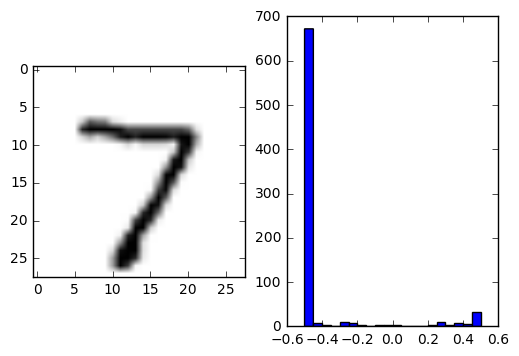

In [8]:
# Let's convert the uint8 image to 32 bit floats and rescale 
# the values to be centered around 0, between [-0.5, 0.5]. 
# 
# We again plot the image and histogram to check that we 
# haven't mangled the data.
scaled = image.astype(numpy.float32)
scaled = (scaled - (255 / 2.0)) / 255
_, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(scaled.reshape(28, 28), cmap=plt.cm.Greys);
ax2.hist(scaled, bins=20, range=[-0.5, 0.5]);

Great -- we've retained the correct image data while properly rescaling to the range [-0.5, 0.5].

## Reading the labels

Let's next unpack the test label data. The format here is similar: a magic number followed by a count followed by the labels as `uint8` values. In more detail:

    [offset] [type]          [value]          [description] 
    0000     32 bit integer  0x00000801(2049) magic number (MSB first) 
    0004     32 bit integer  10000            number of items 
    0008     unsigned byte   ??               label 
    0009     unsigned byte   ??               label 
    ........ 
    xxxx     unsigned byte   ??               label

As with the image data, let's read  the first test set value to sanity check our input path. We'll expect a 7.

In [9]:
with gzip.open(test_labels_filename) as f:
    # Print the header fields.
    for field in ['magic number', 'label count']:
        print(field, struct.unpack('>i', f.read(4))[0])

    print('First label:', struct.unpack('B', f.read(1))[0])

magic number 2049
label count 10000
First label: 7


Indeed, the first label of the test set is 7.

## Forming the training, testing, and validation data sets

Now that we understand how to read a single element, we can read a much larger set that we'll use for training, testing, and validation.

### Image data

The code below is a generalization of our prototyping above that reads the entire test and training data set.

In [10]:
IMAGE_SIZE = 28
PIXEL_DEPTH = 255

def extract_data(filename, num_images):
    """Extract the images into a 4D tensor [image index, y, x, channels].
  
    For MNIST data, the number of channels is always 1.

    Values are rescaled from [0, 255] down to [-0.5, 0.5].
    """
    print('Extracting', filename)
    with gzip.open(filename) as bytestream:
        # Skip the magic number and dimensions; we know these values.
        bytestream.read(16)

        buf = bytestream.read(IMAGE_SIZE * IMAGE_SIZE * num_images)
        data = numpy.frombuffer(buf, dtype=numpy.uint8).astype(numpy.float32)
        data = (data - (PIXEL_DEPTH / 2.0)) / PIXEL_DEPTH
        data = data.reshape(num_images, IMAGE_SIZE, IMAGE_SIZE, 1)
        return data

train_data = extract_data(train_data_filename, 60000)
test_data = extract_data(test_data_filename, 10000)

Extracting /tmp/mnist-data/train-images-idx3-ubyte.gz
Extracting /tmp/mnist-data/t10k-images-idx3-ubyte.gz


A crucial difference here is how we `reshape` the array of pixel values. Instead of one image that's 28x28, we now have a set of 60,000 images, each one being 28x28. We also include a number of channels, which for grayscale images as we have here is 1.

Let's make sure we've got the reshaping parameters right by inspecting the dimensions and the first two images. (Again, mangled input is a very common source of errors.)

Training data shape (60000, 28, 28, 1)


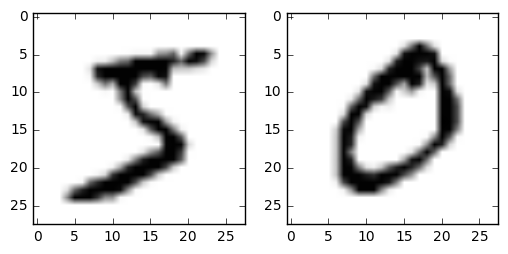

In [11]:
print('Training data shape', train_data.shape)
_, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(train_data[0].reshape(28, 28), cmap=plt.cm.Greys);
ax2.imshow(train_data[1].reshape(28, 28), cmap=plt.cm.Greys);

Looks good. Now we know how to index our full set of training and test images.

### Label data

Let's move on to loading the full set of labels. As is typical in classification problems, we'll convert our input labels into a [1-hot](https://en.wikipedia.org/wiki/One-hot) encoding over a length 10 vector corresponding to 10 digits. The vector [0, 1, 0, 0, 0, 0, 0, 0, 0, 0], for example, would correspond to the digit 1.

In [12]:
NUM_LABELS = 10

def extract_labels(filename, num_images):
    """Extract the labels into a 1-hot matrix [image index, label index]."""
    print('Extracting', filename)
    with gzip.open(filename) as bytestream:
        # Skip the magic number and count; we know these values.
        bytestream.read(8)
        buf = bytestream.read(1 * num_images)
        labels = numpy.frombuffer(buf, dtype=numpy.uint8)
    # Convert to dense 1-hot representation.
    return (numpy.arange(NUM_LABELS) == labels[:, None]).astype(numpy.float32)

train_labels = extract_labels(train_labels_filename, 60000)
test_labels = extract_labels(test_labels_filename, 10000)

Extracting /tmp/mnist-data/train-labels-idx1-ubyte.gz
Extracting /tmp/mnist-data/t10k-labels-idx1-ubyte.gz


As with our image data, we'll double-check that our 1-hot encoding of the first few values matches our expectations.

In [13]:
print('Training labels shape', train_labels.shape)
print('First label vector', train_labels[0])
print('Second label vector', train_labels[1])

Training labels shape (60000, 10)
First label vector [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
Second label vector [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


The 1-hot encoding looks reasonable.

### Segmenting data into training, test, and validation

The final step in preparing our data is to split it into three sets: training, test, and validation. This isn't the format of the original data set, so we'll take a small slice of the training data and treat that as our validation set.

In [14]:
VALIDATION_SIZE = 5000

validation_data = train_data[:VALIDATION_SIZE, :, :, :]
validation_labels = train_labels[:VALIDATION_SIZE]
train_data = train_data[VALIDATION_SIZE:, :, :, :]
train_labels = train_labels[VALIDATION_SIZE:]

train_size = train_labels.shape[0]

print('Validation shape', validation_data.shape)
print('Train size', train_size)

Validation shape (5000, 28, 28, 1)
Train size 55000


# Defining the model

Now that we've prepared our data, we're ready to define our model.

The comments describe the architecture, which fairly typical of models that process image data. The raw input passes through several [convolution](https://en.wikipedia.org/wiki/Convolutional_neural_network#Convolutional_layer) and [max pooling](https://en.wikipedia.org/wiki/Convolutional_neural_network#Pooling_layer) layers with [rectified linear](https://en.wikipedia.org/wiki/Convolutional_neural_network#ReLU_layer) activations before several fully connected layers and a [softmax](https://en.wikipedia.org/wiki/Convolutional_neural_network#Loss_layer) loss for predicting the output class. During training, we use [dropout](https://en.wikipedia.org/wiki/Convolutional_neural_network#Dropout_method).

We'll separate our model definition into three steps:

1. Defining the variables that will hold the trainable weights.
1. Defining the basic model graph structure described above. And,
1. Stamping out several copies of the model graph for training, testing, and validation.

We'll start with the variables.

In [15]:
import tensorflow as tf

# We'll bundle groups of examples during training for efficiency.
# This defines the size of the batch.
BATCH_SIZE = 60
# We have only one channel in our grayscale images.
NUM_CHANNELS = 1
# The random seed that defines initialization.
SEED = 42

# This is where training samples and labels are fed to the graph.
# These placeholder nodes will be fed a batch of training data at each
# training step, which we'll write once we define the graph structure.
train_data_node = tf.placeholder(
  tf.float32,
  shape=(BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, NUM_CHANNELS))
train_labels_node = tf.placeholder(tf.float32,
                                   shape=(BATCH_SIZE, NUM_LABELS))

# For the validation and test data, we'll just hold the entire dataset in
# one constant node.
validation_data_node = tf.constant(validation_data)
test_data_node = tf.constant(test_data)

# The variables below hold all the trainable weights. For each, the
# parameter defines how the variables will be initialized.
conv1_weights = tf.Variable(
  tf.truncated_normal([5, 5, NUM_CHANNELS, 32],  # 5x5 filter, depth 32.
                      stddev=0.1,
                      seed=SEED))
conv1_biases = tf.Variable(tf.zeros([32]))
conv2_weights = tf.Variable(
  tf.truncated_normal([5, 5, 32, 64],
                      stddev=0.1,
                      seed=SEED))
conv2_biases = tf.Variable(tf.constant(0.1, shape=[64]))
fc1_weights = tf.Variable(  # fully connected, depth 512.
  tf.truncated_normal([IMAGE_SIZE // 4 * IMAGE_SIZE // 4 * 64, 512],
                      stddev=0.1,
                      seed=SEED))
fc1_biases = tf.Variable(tf.constant(0.1, shape=[512]))
fc2_weights = tf.Variable(
  tf.truncated_normal([512, NUM_LABELS],
                      stddev=0.1,
                      seed=SEED))
fc2_biases = tf.Variable(tf.constant(0.1, shape=[NUM_LABELS]))

print('Done')

Done


Now that we've defined the variables to be trained, we're ready to wire them together into a TensorFlow graph.

We'll define a helper to do this, `model`, which will return copies of the graph suitable for training and testing. Note the `train` argument, which controls whether or not dropout is used in the hidden layer. (We want to use dropout only during training.)

In [16]:
def model(data, train=False):
    """The Model definition."""
    # 2D convolution, with 'SAME' padding (i.e. the output feature map has
    # the same size as the input). Note that {strides} is a 4D array whose
    # shape matches the data layout: [image index, y, x, depth].
    conv = tf.nn.conv2d(data,
                        conv1_weights,
                        strides=[1, 1, 1, 1],
                        padding='SAME')

    # Bias and rectified linear non-linearity.
    relu = tf.nn.relu(tf.nn.bias_add(conv, conv1_biases))

    # Max pooling. The kernel size spec ksize also follows the layout of
    # the data. Here we have a pooling window of 2, and a stride of 2.
    pool = tf.nn.max_pool(relu,
                          ksize=[1, 2, 2, 1],
                          strides=[1, 2, 2, 1],
                          padding='SAME')
    conv = tf.nn.conv2d(pool,
                        conv2_weights,
                        strides=[1, 1, 1, 1],
                        padding='SAME')
    relu = tf.nn.relu(tf.nn.bias_add(conv, conv2_biases))
    pool = tf.nn.max_pool(relu,
                          ksize=[1, 2, 2, 1],
                          strides=[1, 2, 2, 1],
                          padding='SAME')

    # Reshape the feature map cuboid into a 2D matrix to feed it to the
    # fully connected layers.
    pool_shape = pool.get_shape().as_list()
    reshape = tf.reshape(
        pool,
        [pool_shape[0], pool_shape[1] * pool_shape[2] * pool_shape[3]])
  
    # Fully connected layer. Note that the '+' operation automatically
    # broadcasts the biases.
    hidden = tf.nn.relu(tf.matmul(reshape, fc1_weights) + fc1_biases)

    # Add a 50% dropout during training only. Dropout also scales
    # activations such that no rescaling is needed at evaluation time.
    if train:
        hidden = tf.nn.dropout(hidden, 0.5, seed=SEED)
    return tf.matmul(hidden, fc2_weights) + fc2_biases

print('Done')

Done


Having defined the basic structure of the graph, we're ready to stamp out multiple copies for training, testing, and validation.

Here, we'll do some customizations depending on which graph we're constructing. `train_prediction` holds the training graph, for which we use cross-entropy loss and weight regularization. We'll adjust the learning rate during training -- that's handled by the `exponential_decay` operation, which is itself an argument to the `MomentumOptimizer` that performs the actual training.

The vaildation and prediction graphs are much simpler the generate -- we need only create copies of the model with the validation and test inputs and a softmax classifier as the output.

In [17]:
# Training computation: logits + cross-entropy loss.
logits = model(train_data_node, True)
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
  logits, train_labels_node))

# L2 regularization for the fully connected parameters.
regularizers = (tf.nn.l2_loss(fc1_weights) + tf.nn.l2_loss(fc1_biases) +
                tf.nn.l2_loss(fc2_weights) + tf.nn.l2_loss(fc2_biases))
# Add the regularization term to the loss.
loss += 5e-4 * regularizers

# Optimizer: set up a variable that's incremented once per batch and
# controls the learning rate decay.
batch = tf.Variable(0)
# Decay once per epoch, using an exponential schedule starting at 0.01.
learning_rate = tf.train.exponential_decay(
  0.01,                # Base learning rate.
  batch * BATCH_SIZE,  # Current index into the dataset.
  train_size,          # Decay step.
  0.95,                # Decay rate.
  staircase=True)
# Use simple momentum for the optimization.
optimizer = tf.train.MomentumOptimizer(learning_rate,
                                       0.9).minimize(loss,
                                                     global_step=batch)

# Predictions for the minibatch, validation set and test set.
train_prediction = tf.nn.softmax(logits)
# We'll compute them only once in a while by calling their {eval()} method.
validation_prediction = tf.nn.softmax(model(validation_data_node))
test_prediction = tf.nn.softmax(model(test_data_node))

print('Done')

Done


# Training and visualizing results

Now that we have the training, test, and validation graphs, we're ready to actually go through the training loop and periodically evaluate loss and error.

All of these operations take place in the context of a session. In Python, we'd write something like:

    with tf.Session() as s:
      ...training / test / evaluation loop...
  
But, here, we'll want to keep the session open so we can poke at values as we work out the details of training. The TensorFlow API includes a function for this, `InteractiveSession`.

We'll start by creating a session and initializing the varibles we defined above.

In [18]:
# Create a new interactive session that we'll use in
# subsequent code cells.
s = tf.InteractiveSession()

# Use our newly created session as the default for 
# subsequent operations.
s.as_default()

# Initialize all the variables we defined above.
tf.initialize_all_variables().run()

Now we're ready to perform operations on the graph. Let's start with one round of training. We're going to organize our training steps into batches for efficiency; i.e., training using a small set of examples at each step rather than a single example.

In [19]:
BATCH_SIZE = 60

# Grab the first BATCH_SIZE examples and labels.
batch_data = train_data[:BATCH_SIZE, :, :, :]
batch_labels = train_labels[:BATCH_SIZE]

# This dictionary maps the batch data (as a numpy array) to the
# node in the graph it should be fed to.
feed_dict = {train_data_node: batch_data,
             train_labels_node: batch_labels}

# Run the graph and fetch some of the nodes.
_, l, lr, predictions = s.run(
  [optimizer, loss, learning_rate, train_prediction],
  feed_dict=feed_dict)

print('Done')

Done


Let's take a look at the predictions. How did we do? Recall that the output will be probabilities over the possible classes, so let's look at those probabilities.

In [20]:
print(predictions[0])

[  2.25393116e-04   4.76219611e-05   1.66867452e-03   5.67827519e-05
   6.03432178e-01   4.34969068e-02   2.19316553e-05   1.41286102e-04
   1.54903100e-05   3.50893795e-01]


As expected without training, the predictions are all noise. Let's write a scoring function that picks the class with the maximum probability and compares with the example's label. We'll start by converting the probability vectors returned by the softmax into predictions we can match against the labels.

In [21]:
# The highest probability in the first entry.
print('First prediction', numpy.argmax(predictions[0]))

# But, predictions is actually a list of BATCH_SIZE probability vectors.
print(predictions.shape)

# So, we'll take the highest probability for each vector.
print('All predictions', numpy.argmax(predictions, 1))

First prediction 4
(60, 10)
All predictions [4 4 2 7 7 7 7 7 7 7 7 7 0 8 9 0 7 7 0 7 4 0 5 0 9 9 7 0 7 4 7 7 7 0 7 7 9
 7 9 9 0 7 7 7 2 7 0 7 2 9 9 9 9 9 0 7 9 4 8 7]


Next, we can do the same thing for our labels -- using `argmax` to convert our 1-hot encoding into a digit class.

In [22]:
print('Batch labels', numpy.argmax(batch_labels, 1))

Batch labels [7 3 4 6 1 8 1 0 9 8 0 3 1 2 7 0 2 9 6 0 1 6 7 1 9 7 6 5 5 8 8 3 4 4 8 7 3
 6 4 6 6 3 8 8 9 9 4 4 0 7 8 1 0 0 1 8 5 7 1 7]


Now we can compare the predicted and label classes to compute the error rate and confusion matrix for this batch.

0.0666666666667


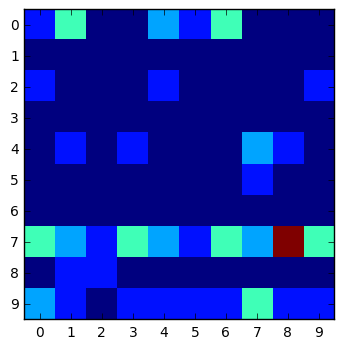

In [23]:
correct = numpy.sum(numpy.argmax(predictions, 1) == numpy.argmax(batch_labels, 1))
total = predictions.shape[0]

print(float(correct) / float(total))

confusions = numpy.zeros([10, 10], numpy.float32)
bundled = zip(numpy.argmax(predictions, 1), numpy.argmax(batch_labels, 1))
for predicted, actual in bundled:
  confusions[predicted, actual] += 1

plt.grid(False)
plt.xticks(numpy.arange(NUM_LABELS))
plt.yticks(numpy.arange(NUM_LABELS))
plt.imshow(confusions, cmap=plt.cm.jet, interpolation='nearest');

Now let's wrap this up into our scoring function.

In [24]:
def error_rate(predictions, labels):
    """Return the error rate and confusions."""
    correct = numpy.sum(numpy.argmax(predictions, 1) == numpy.argmax(labels, 1))
    total = predictions.shape[0]

    error = 100.0 - (100 * float(correct) / float(total))

    confusions = numpy.zeros([10, 10], numpy.float32)
    bundled = zip(numpy.argmax(predictions, 1), numpy.argmax(labels, 1))
    for predicted, actual in bundled:
        confusions[predicted, actual] += 1
    
    return error, confusions

print('Done')

Done


We'll need to train for some time to actually see useful predicted values. Let's define a loop that will go through our data. We'll print the loss and error periodically.

Here, we want to iterate over the entire data set rather than just the first batch, so we'll need to slice the data to that end.

(One pass through our training set will take some time on a CPU, so be patient if you are executing this notebook.)

In [25]:
# Train over the first 1/4th of our training set.
steps = train_size // BATCH_SIZE
for step in range(steps):
    # Compute the offset of the current minibatch in the data.
    # Note that we could use better randomization across epochs.
    offset = (step * BATCH_SIZE) % (train_size - BATCH_SIZE)
    batch_data = train_data[offset:(offset + BATCH_SIZE), :, :, :]
    batch_labels = train_labels[offset:(offset + BATCH_SIZE)]
    # This dictionary maps the batch data (as a numpy array) to the
    # node in the graph it should be fed to.
    feed_dict = {train_data_node: batch_data,
                 train_labels_node: batch_labels}
    # Run the graph and fetch some of the nodes.
    _, l, lr, predictions = s.run(
      [optimizer, loss, learning_rate, train_prediction],
      feed_dict=feed_dict)
    
    # Print out the loss periodically.
    if step % 100 == 0:
        error, _ = error_rate(predictions, batch_labels)
        print('Step %d of %d' % (step, steps))
        print('Mini-batch loss: %.5f Error: %.5f Learning rate: %.5f' % (l, error, lr))
        print('Validation error: %.1f%%' % error_rate(
              validation_prediction.eval(), validation_labels)[0])


Step 0 of 916
Mini-batch loss: 7.71258 Error: 91.66667 Learning rate: 0.01000
Validation error: 88.9%
Step 100 of 916
Mini-batch loss: 3.27891 Error: 6.66667 Learning rate: 0.01000
Validation error: 5.8%
Step 200 of 916
Mini-batch loss: 3.31473 Error: 11.66667 Learning rate: 0.01000
Validation error: 3.7%
Step 300 of 916
Mini-batch loss: 3.19320 Error: 5.00000 Learning rate: 0.01000
Validation error: 3.3%
Step 400 of 916
Mini-batch loss: 3.12550 Error: 3.33333 Learning rate: 0.01000
Validation error: 2.8%
Step 500 of 916
Mini-batch loss: 3.03451 Error: 1.66667 Learning rate: 0.01000
Validation error: 2.3%
Step 600 of 916
Mini-batch loss: 3.03855 Error: 5.00000 Learning rate: 0.01000
Validation error: 2.0%
Step 700 of 916
Mini-batch loss: 3.13652 Error: 6.66667 Learning rate: 0.01000
Validation error: 2.0%
Step 800 of 916
Mini-batch loss: 3.06170 Error: 3.33333 Learning rate: 0.01000
Validation error: 1.9%
Step 900 of 916
Mini-batch loss: 2.85316 Error: 0.00000 Learning rate: 0.01000
Va

The error seems to have gone down. Let's evaluate the results using the test set.

To help identify rare mispredictions, we'll include the raw count of each (prediction, label) pair in the confusion matrix.

In [40]:
test_error, confusions = error_rate(test_prediction.eval(), test_labels)
print('Test error: %.1f%%' % test_error)

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid(False)
plt.xticks(numpy.arange(NUM_LABELS))
plt.yticks(numpy.arange(NUM_LABELS))
plt.imshow(confusions, cmap=plt.cm.jet, interpolation='nearest');

for i, cas in enumerate(confusions):
    for j, count in enumerate(cas):
        if count > 0:
            xoff = .07 * len(str(count))
            plt.text(j-xoff, i+.2, int(count), fontsize=9, color='white')

ResourceExhaustedError: OOM when allocating tensor with shape[10000,32,28,28]
	 [[Node: Conv2D_10 = Conv2D[T=DT_FLOAT, data_format="NHWC", padding="SAME", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true, _device="/job:localhost/replica:0/task:0/gpu:0"](Const_7, Variable_9/read)]]
	 [[Node: Softmax_5/_41 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/cpu:0", send_device="/job:localhost/replica:0/task:0/gpu:0", send_device_incarnation=1, tensor_name="edge_5_Softmax_5", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/cpu:0"]()]]

Caused by op u'Conv2D_10', defined at:
  File "/usr/lib/python2.7/runpy.py", line 162, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/usr/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python2.7/dist-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/kernelapp.py", line 474, in start
    ioloop.IOLoop.instance().start()
  File "/usr/local/lib/python2.7/dist-packages/zmq/eventloop/ioloop.py", line 162, in start
    super(ZMQIOLoop, self).start()
  File "/usr/local/lib/python2.7/dist-packages/tornado/ioloop.py", line 887, in start
    handler_func(fd_obj, events)
  File "/usr/local/lib/python2.7/dist-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/usr/local/lib/python2.7/dist-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/usr/local/lib/python2.7/dist-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/kernelbase.py", line 276, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/kernelbase.py", line 228, in dispatch_shell
    handler(stream, idents, msg)
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/kernelbase.py", line 390, in execute_request
    user_expressions, allow_stdin)
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/zmqshell.py", line 501, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):
  File "/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-30-5c825de8dd77>", line 31, in <module>
    test_prediction = tf.nn.softmax(model(test_data_node))
  File "<ipython-input-29-ddd4bdc4d43d>", line 9, in model
    padding='SAME')
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/ops/gen_nn_ops.py", line 394, in conv2d
    data_format=data_format, name=name)
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/framework/op_def_library.py", line 749, in apply_op
    op_def=op_def)
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/framework/ops.py", line 2380, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/framework/ops.py", line 1298, in __init__
    self._traceback = _extract_stack()

ResourceExhaustedError (see above for traceback): OOM when allocating tensor with shape[10000,32,28,28]
	 [[Node: Conv2D_10 = Conv2D[T=DT_FLOAT, data_format="NHWC", padding="SAME", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true, _device="/job:localhost/replica:0/task:0/gpu:0"](Const_7, Variable_9/read)]]
	 [[Node: Softmax_5/_41 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/cpu:0", send_device="/job:localhost/replica:0/task:0/gpu:0", send_device_incarnation=1, tensor_name="edge_5_Softmax_5", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/cpu:0"]()]]


We can see here that we're mostly accurate, with some errors you might expect, e.g., '9' is often confused as '4'.

Let's do another sanity check to make sure this matches roughly the distribution of our test set, e.g., it seems like we have fewer '5' values.

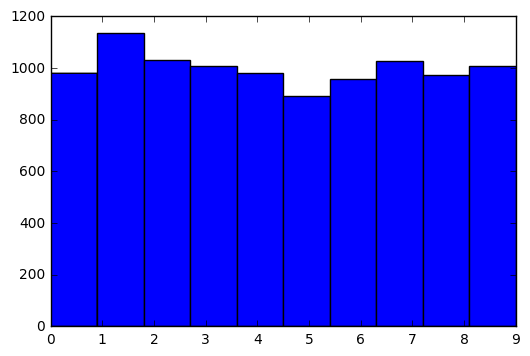

In [25]:
plt.xticks(numpy.arange(NUM_LABELS))
plt.hist(numpy.argmax(test_labels, 1));

Indeed, we appear to have fewer 5 labels in the test set. So, on the whole, it seems like our model is learning and our early results are sensible.

But, we've only done one round of training. We can greatly improve accuracy by training for longer. To try this out, just re-execute the training cell above.